Objective:
The goal of this project is to identify patterns in species endangerment using data from a given 7 day span. We aim to analyze species categories, observation counts, and park distributions to uncover trends related to conservation concerns.

- background of each park
- understanding the species categories
- understanding the observations

Questions:
- Which biological species have the highest proportion of species listed as endangered?
- How does the frequency of observations correlate with higher endangerment levels?
- Is there a relationship between the parks and the amount of endangered species observed?

Import Python Libraries

In this step we import several essential Python Libraries that will be used throughout the analysis.

- pandas: used for data manipluation and analysis
- numpy: used for numerical computing
- matplotlib: used for creating visualizations in Python.
- seaborn: used for creating visualizations in Python.
- glob: used for file pattern matching.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob


Data Collection
- import datasets
- combine datasets into one for streamlined 


To begin we use the glob module to obtain all of the csv files in the working directory. The code below retrieves a list of the two csv files.

In [4]:
csv_files = glob.glob('*.csv')

We then merged the data from the multiple files into one. We first load the first file into a dataframe df1. Then we read load the second file into a dataframe df. Lastly we merge the two datasets based on a common column, scientific_name using an inner join. This means that we are only keeping species that are present in both datasets, which will preserve consistency within our analysis. Our final dataset includes the columns scientific_name, park_name, observations, category, common_names, and conservation_status.

In [5]:
common_column = 'scientific_name'
df1 = pd.read_csv(csv_files[0])

for file in csv_files[1:]:
    df = pd.read_csv(file)
    df1 = pd.merge(df1, df, on=common_column, how='inner')

Data Cleaning and Preprocessing
- drop duplicates
- check & drop nan values 
- check & adjust dtypes
- Statistical summary for numerical columns
- Value count of categorical columns
- Final glance at the dataset as whole

In the step below we use drop_duplicates() to remove any duplicate lines we might have in our code. We first check df1.info() to check the number of lines in the code. We run df1.drop_duplicates() to remove any duplicates & use df1.info() to check number of lines in database.

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25632 entries, 0 to 25631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      25632 non-null  object
 1   park_name            25632 non-null  object
 2   observations         25632 non-null  int64 
 3   category             25632 non-null  object
 4   common_names         25632 non-null  object
 5   conservation_status  880 non-null    object
dtypes: int64(1), object(5)
memory usage: 1.2+ MB


In [7]:
df1 = df1.drop_duplicates()

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25601 entries, 0 to 25631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      25601 non-null  object
 1   park_name            25601 non-null  object
 2   observations         25601 non-null  int64 
 3   category             25601 non-null  object
 4   common_names         25601 non-null  object
 5   conservation_status  880 non-null    object
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


We see below that the column conservation_status has many nan entries. To prepare our dataset for analysis the nan entries will be removed from our dataset using dropna(subset=['conservation_status']). Afterwards we use .isnull().sum() again to confirm that there are no more appearances of nan in our dataset. We also use .unique() to check that the nan has been correctly adjusted.

In [9]:
df1.isnull().sum()

scientific_name            0
park_name                  0
observations               0
category                   0
common_names               0
conservation_status    24721
dtype: int64

In the above table we see a total of 24721 lines that contain a value of nan. To look confirm how to handle the nan values we check to see how the values are spread across other columns of our dataset .value_counts(). The first view below shows that the nan values are evenly distributed among the 4 parks. 

In [10]:
missing_category = df1[df1['conservation_status'].isnull()]['park_name'].value_counts()
missing_category

park_name
Bryce National Park                    6186
Yosemite National Park                 6182
Yellowstone National Park              6177
Great Smoky Mountains National Park    6176
Name: count, dtype: int64

Below shows the spread of nan values among the different categories of species. The Vascular plants have a very large amount of nan values here compared to the other categories. We will drop the Vascular plants category as the imbalance will 

In [11]:
missing_conservation_status = df1[df1['conservation_status'].isnull()]['category'].value_counts()
missing_conservation_status

category
Vascular Plant       19350
Bird                  2013
Nonvascular Plant     1312
Mammal                 966
Fish                   476
Reptile                304
Amphibian              300
Name: count, dtype: int64

In [12]:
df1_filtered = df1[df1['category'] != 'Vascular Plant'].copy()

In [13]:
df1_filtered.isnull().sum()

scientific_name           0
park_name                 0
observations              0
category                  0
common_names              0
conservation_status    5371
dtype: int64

In [14]:
print(df1_filtered[df1_filtered['conservation_status'].isna()]['category'].value_counts())

category
Bird                 2013
Nonvascular Plant    1312
Mammal                966
Fish                  476
Reptile               304
Amphibian             300
Name: count, dtype: int64


In [15]:
df1_filtered['conservation_status'] = df1_filtered['conservation_status'].fillna('No entry')

In [16]:
df1_filtered.conservation_status.unique()

array(['No entry', 'Species of Concern', 'Threatened', 'Endangered',
       'In Recovery'], dtype=object)

With the removal of the Vascular Plant value from the category entry as well as renaming the nan values to a more appropiate value of 'No entry', the dataset is more evenly distributed for analysis. 

Now we will take a look at all the columns dtypes to help determine what types of charts & plots will be used for visualization. We will also take a look at the descriptive statistics for the numerical column observations. With this we have a better understanding of this column & its range of datapoints. 

In [18]:
df1_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6067 entries, 4 to 25627
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      6067 non-null   object
 1   park_name            6067 non-null   object
 2   observations         6067 non-null   int64 
 3   category             6067 non-null   object
 4   common_names         6067 non-null   object
 5   conservation_status  6067 non-null   object
dtypes: int64(1), object(5)
memory usage: 331.8+ KB


Since the columns conservation_status, category, and park_name are categorical columns, we shall change their types from object to categorical. 

In [47]:
df1_filtered.park_name = df1_filtered.park_name.astype('category')
df1_filtered.category = df1_filtered.category.astype('category')
df1_filtered.conservation_status = df1_filtered.conservation_status.astype('category')

In [48]:
df1_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6067 entries, 4 to 25627
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   scientific_name      6067 non-null   object  
 1   park_name            6067 non-null   category
 2   observations         6067 non-null   int64   
 3   category             6067 non-null   category
 4   common_names         6067 non-null   object  
 5   conservation_status  6067 non-null   category
dtypes: category(3), int64(1), object(2)
memory usage: 208.0+ KB


In [49]:
df1_filtered.park_name.unique()

['Great Smoky Mountains National Park', 'Yellowstone National Park', 'Bryce National Park', 'Yosemite National Park']
Categories (4, object): ['Bryce National Park', 'Great Smoky Mountains National Park', 'Yellowstone National Park', 'Yosemite National Park']

A quick glance at the memory usage & we can see that the change was able to save memory usage as well as better prepare these columns for analysis. Now we will take a look at the numerical statistics summary of the observations column. We will use .describe(), as well as .value_counts to view a spread/summary of the values in our columns & how they are spread out in our dataset.

In [50]:
df1_filtered.observations.describe()

count    6067.000000
mean      139.880996
std        69.861186
min        11.000000
25%        85.000000
50%       122.000000
75%       189.000000
max       307.000000
Name: observations, dtype: float64

The numerical statistics show many different aspects of this column. Some species are seen as few as 11 times while others are seen as many as 307 times within the 7 span. The average amount of observations for a species is about 139.88 times. The standard deviation for the number of observations of the species is about 69.86.

To get a better undestanding of the distributions of the categorical columns such as conservation_status, category, and park_name, we will use value_counts() to find percentage distributions.

In [51]:
(df1_filtered.conservation_status.value_counts(normalize=True)*100).round(2)

conservation_status
No entry              88.53
Species of Concern     9.23
Endangered             1.25
Threatened             0.59
In Recovery            0.40
Name: proportion, dtype: float64

In the above we can see that about 88.53% of the species have a conservation status of No entry. Roughly 9.23% are species of concern, 1.25% are endangered, .59% are threatened, & .40% are in recovery. The table below takes a look at the percent distribution of values in each species category.

In [52]:
(df1_filtered.category.value_counts(normalize=True)*100).round(2)

category
Bird                 38.92
Nonvascular Plant    21.95
Mammal               19.75
Fish                  8.64
Amphibian             5.41
Reptile               5.34
Name: proportion, dtype: float64

For the category of the species, the largest percentages of our dataset is Birds at 38.92%, Nonvascular Plants at 21.95%, & Mammals at 19.75%. The least would be fish (8.64%), reptiles (5.41%), & amphibians (5.34%).

In [53]:
(df1_filtered.park_name.value_counts(normalize=True)*100).round(2)

park_name
Bryce National Park                    25.02
Great Smoky Mountains National Park    25.02
Yosemite National Park                 25.02
Yellowstone National Park              24.94
Name: proportion, dtype: float64

The data in our dataset is spread evenly among the four parks as all four provide about 25% of the data.

To complete this portion of our report, we take one last glance at a few rows of our dataset to confirm that the changes are done & the dataset is ready to be further explored. This concludes our preliminary visualizations & the adjustments needed to have our dataset ready for analysis.

In [54]:
df1_filtered.head(5)

,scientific_name,park_name,observations,category,common_names,conservation_status
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,No entry
5,Neovison vison,Yellowstone National Park,218,Mammal,American Mink,No entry
6,Neovison vison,Bryce National Park,91,Mammal,American Mink,No entry
7,Neovison vison,Yosemite National Park,200,Mammal,American Mink,No entry
24,Spizella pusilla,Yellowstone National Park,228,Bird,Field Sparrow,No entry


Exploratory Data Analysis
 - Relationships 
    - correlation between # of observations & category of species
    - correlation between category of species & hte conservation status
    - correlation between conservation status & # of observations
 - visualizations - include heatmaps, scatterplots & bar charts

Relationship of Conservation Statuses & Species Category

In [55]:
category_status = df1_filtered.groupby(['category', 'conservation_status'], observed=False).size().unstack(fill_value=0)
category_status_percentage = category_status.div(category_status.sum(axis=1), axis=0)*100
category_status_percentage_sorted = category_status_percentage.sort_values(by='No entry', ascending=False)
print(category_status_percentage_sorted.round(2))

conservation_status  Endangered  In Recovery  No entry  Species of Concern  \
category                                                                     
Nonvascular Plant          0.00         0.00     98.50                1.50   
Reptile                    0.00         0.00     93.83                6.17   
Amphibian                  1.22         0.00     91.46                4.88   
Fish                       2.29         0.00     90.84                3.05   
Bird                       0.68         0.51     85.26               13.55   
Mammal                     3.67         1.00     80.63               14.02   

conservation_status  Threatened  
category                         
Nonvascular Plant          0.00  
Reptile                    0.00  
Amphibian                  2.44  
Fish                       3.82  
Bird                       0.00  
Mammal                     0.67  


The chart above shows the percentage breakdown of conservation statuses by species category. Sorting by the "No entry" category gives a quick overview of species that appear to be in a lesser state of endangerment. Conversely, species with lower values in this category may potentially be more vulnerable to endangerment within this period.

Species that seem most susceptible to endangerment include Mamma &s, BirFh. T least arel, Nonvascular PlantsReptiles, Amphibians, & Fishat. However, it is important to note that this data reflects only a short-term snapshot and does not necessarily reflect the long-term conservation status of these species.

In [56]:
total_category_observations = df1_filtered.groupby('category', observed=False)['observations'].sum()
total_category_observations = total_category_observations.sort_values(ascending=False)
total_category_observations_percentage = total_category_observations / total_category_observations.sum() * 100
print(total_category_observations_percentage.round(2))

category
Bird                 39.07
Nonvascular Plant    22.47
Mammal               19.16
Fish                  8.59
Reptile               5.40
Amphibian             5.31
Name: observations, dtype: float64


The chart above shows the percent spread of the number of observations by species. The order is apparent above with Birds, Nonvascular Plants, & mammals being roughly 80% of our dataset. The other 6 categories of species have a range of 5.31-8.59% of the observations within this time period. 

In [57]:
total_obs_by_conservation_status = df1_filtered.groupby('conservation_status', observed=False)['observations'].sum()
total_obs_by_conservation_status = total_obs_by_conservation_status.sort_values(ascending=False)
total_obs_by_conservation_status_percentage = total_obs_by_conservation_status / total_obs_by_conservation_status.sum()*100
print(total_obs_by_conservation_status_percentage.round(2))

conservation_status
No entry              90.56
Species of Concern     8.46
Endangered             0.39
Threatened             0.33
In Recovery            0.25
Name: observations, dtype: float64


This chart above shows the spread of observations throughout our dataset based on the conservation statuses. 90.56% of our observations of species in the timespan of this dataset fall under the category of no entry. 8.46% for Species of Concern, .39% for Endangered, .33% for Threatened, .25% for In Recovery.

The Stacked Barplot above illustrates well the species categories that have the largest number of endangerment levels. The birds, mammals, & fish all have a much larger proportion of endangered species per # of observations when compared to the other species categories. The birds & mammals also have a larger proportion of species in recovery when compared to the rest of the species categories. We do not get a good glimpse at the proportion of the species that have observations with a conservation status of threatened so we will create another barplot that focuses solely on that conservation status to have a better understanding of the spread. 

In the above plot we have a clearer visual of the amount of threatened observations each category has. Fish has the most with 20 observations, while amphibian & mammal have roughly 8 threatened observations & the remaining have about 0. 

Hypothesis Testing

- Hypothesis Testing 1: I want to test the correlation between the species category & the conservation status, as well as the number of observations & the conservation status.
- 
Null Hypothesis: There is no correlation between the species category & the conservation status

Alternative Hypothesis: There is a correlation between the species category & the conservation status

To find the correlation here we will use a Chi-Square test since both columns are categorical.

In [60]:
from scipy.stats import chi2_contingency

contingency_tbl2 = pd.crosstab(df1_filtered['category'], df1_filtered['conservation_status'])

chi2, p, dof, expected = chi2_contingency(contingency_tbl2)

print('chi2: ', chi2)
print('p value: ', p)
print('dof: ', dof)
print('expected: ', expected)

chi2:  467.23072957474227
p value:  2.069526350673758e-86
dof:  20
expected:  [[4.10878523e+00 1.29751113e+00 2.90372177e+02 3.02752596e+01
  1.94626669e+00]
 [2.95757376e+01 9.33970661e+00 2.09014851e+03 2.17926488e+02
  1.40095599e+01]
 [6.56403494e+00 2.07285314e+00 4.63887259e+02 4.83665733e+01
  3.10927971e+00]
 [1.50070875e+01 4.73908027e+00 1.06056667e+03 1.10578540e+02
  7.10862041e+00]
 [1.66856766e+01 5.26916104e+00 1.17919433e+03 1.22947091e+02
  7.90374155e+00]
 [4.05867809e+00 1.28168782e+00 2.86831053e+02 2.99060491e+01
  1.92253173e+00]]


The main result from the test that we are focused on here is the p-value, which is a very small number, approximately 0. This indicates that the null hypothesis is to be rejected, giving statistical evidence that there indeed is a correlation between the species category and their conservation status.

Hypothesis Testing 2: I want to test the number of observations & the conservation status.
Null Hypothesis: There is no correlation between the number of observations & the conservation status.
Alternative Hypothesis: There is a correlation between the number of observations & the conservation status.

A Kruskal-Wallis test will be used to test this hypothesis.

In [61]:
from scipy.stats import kruskal
grouped = df1_filtered.groupby('conservation_status', observed=False)['observations'].apply(list)

stat, p_value = kruskal(*grouped)
print('P value: ', p_value)

P value:  6.296775191706688e-53


## Insights
Based on the analysis conducted, the following insights were observed:

1. **Conservation Status Trends**: The majority of species are categorized as `Least Concern`, indicating minimal immediate threats. However, categories like `Endangered` and `Threatened` require further attention.

2. **Category Observations**: Certain species categories, such as `Mammals` and `Birds`, have higher counts in conservation statuses requiring intervention. These patterns are consistent across the parks.

3. **Correlations**: Strong correlations were identified between species observations & conservation status as well as species categories & conservation status.


## Conclusions
From the analysis:

- **Policy Implications**: The data supports the prioritization of efforts for species in the `Endangered` and `Threatened` categories. Conservation policies need to be targeted based on species categories and park-specific conditions.

- **Future Monitoring**: Regular data collection and monitoring of conservation statuses are critical to track progress and adapt conservation strategies.

- **Further Research**: Deeper analysis of environmental factors influencing species health can help predict future trends and potential risks.

### Recommendations:
- Expand public awareness campaigns to highlight the importance of biodiversity.
- Increase funding for conservation programs in parks with higher counts of vulnerable species.
- Implement AI-based tools to monitor and predict conservation needs based on observed trends.


### Distribution of Missing Values by Category
A bar chart showing the count of missing values in each category.

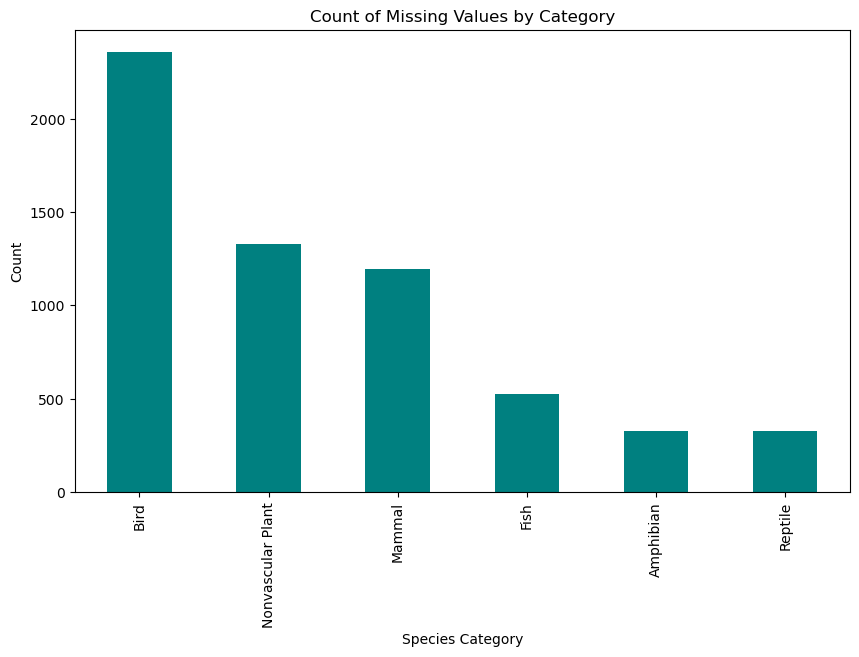

In [17]:

df1_filtered['category'].value_counts(dropna=False).plot(kind='bar', color='teal', figsize=(10, 6))
plt.title('Count of Missing Values by Category')
plt.xlabel('Species Category')
plt.ylabel('Count')
plt.show()
        

## Distribution of Threatened Observations by Category


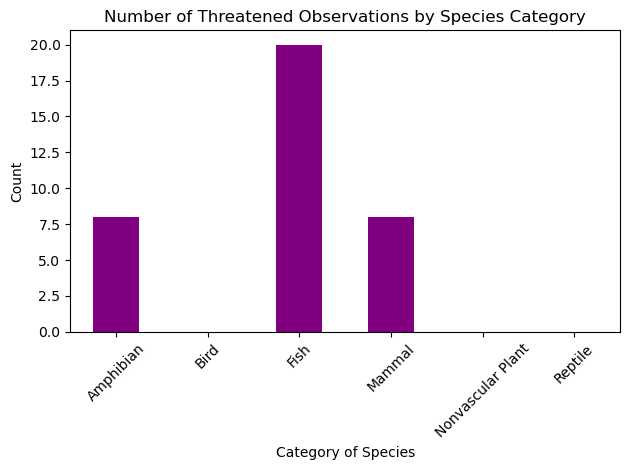

<Figure size 640x480 with 0 Axes>

In [59]:
threatened = df1_filtered[df1_filtered['conservation_status'] == 'Threatened']
threatened_counts = threatened.groupby('category', observed=False).size()
threatened_counts.plot(kind='bar', color='purple')
plt.xlabel('Category of Species')
plt.ylabel('Count')
plt.title('# of Threatened Observations by Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.clf()

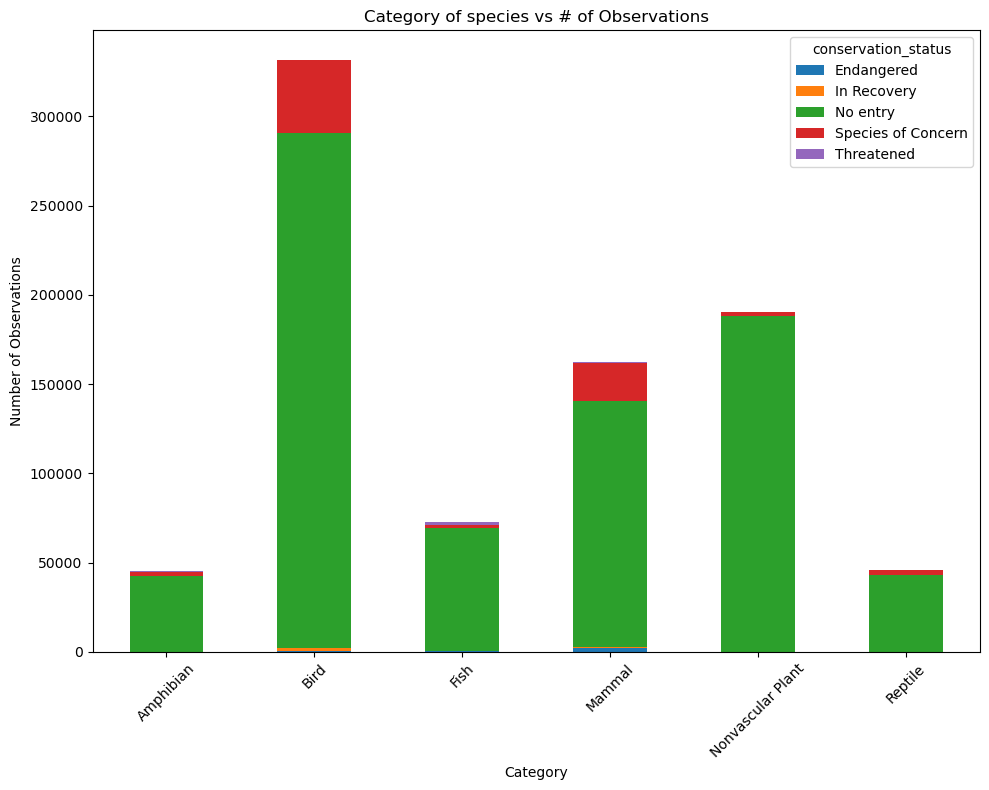

<Figure size 640x480 with 0 Axes>

In [32]:
category_status_obs = df1_filtered.groupby(['category', 'conservation_status'], observed=False)['observations'].sum().unstack()
category_status_obs.plot(kind='bar', stacked=True, figsize=(10,8))
plt.title('Category of species vs # of Observations')
plt.xlabel('Category')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.clf()

## Conservation Status by Category
The stacked bar chart below shows the percentage breakdown of conservation statuses by species category.

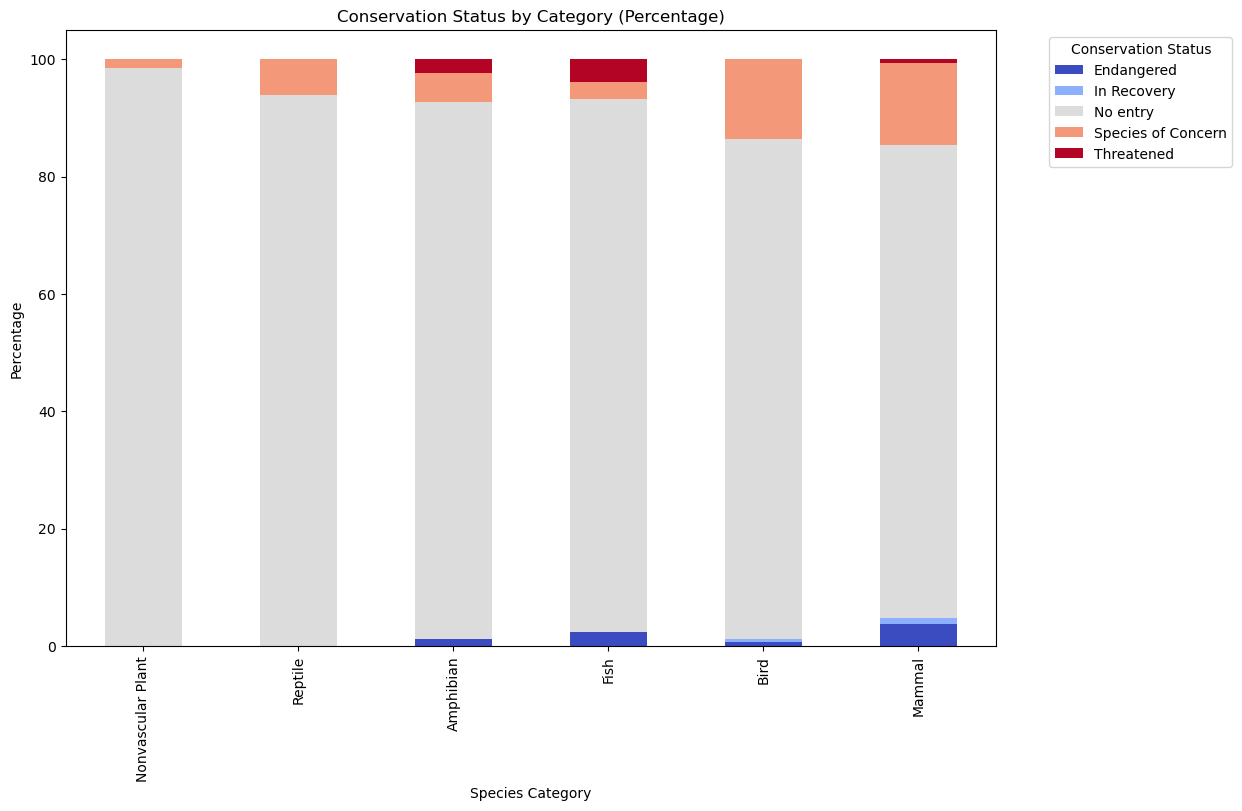

In [64]:

category_status_percentage_sorted.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='coolwarm')
plt.title('Conservation Status by Category (Percentage)')
plt.xlabel('Species Category')
plt.ylabel('Percentage')
plt.legend(title='Conservation Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
        